## Libraries

In [72]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

## Import Data

In [83]:
df_forest = pd.read_csv("train.csv")

## Explore Data

In [3]:
df_forest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df_forest.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Removing Variables

In [84]:
#Removing ID as it will not contribute to the model 
# removing soil type 7 and 15 as it has no values
df_forest_rem = df_forest.drop(columns=['Id', 'Soil_Type7', 'Soil_Type15'])

## Correlation

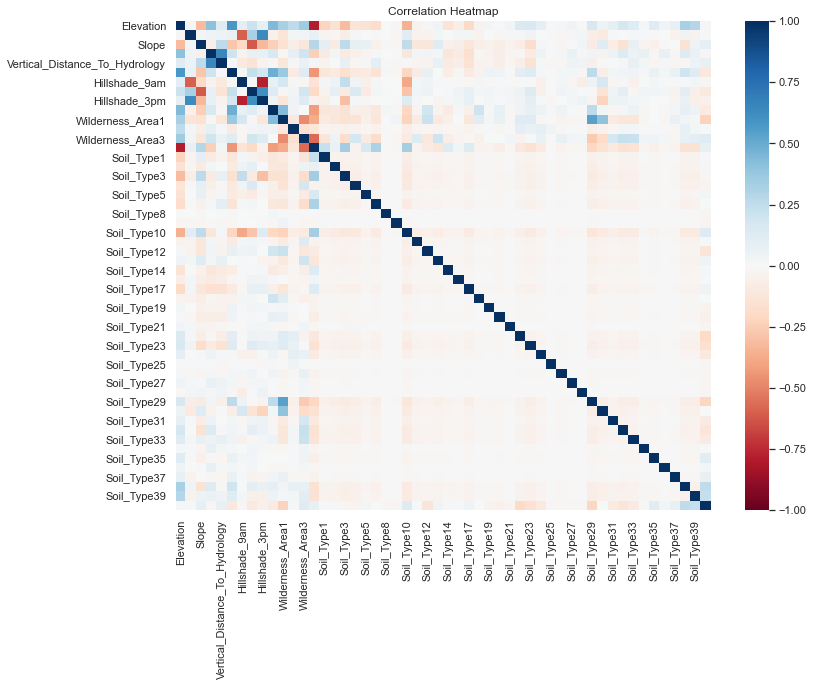

In [6]:
#Finding correlation between variables
#df_forest.corr()

plt.figure(figsize = (12, 9))
s = sns.heatmap(df_forest_rem.corr(),
                cmap = 'RdBu',
                vmin = -1, 
                vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

## Splitting into independent (X) and dependent (y) variable

In [87]:
X = df_forest_rem.drop(columns=['Cover_Type']).values
y =  df_forest_rem['Cover_Type'].values

## Train Test Split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Standardization

In [7]:
# Standardisation = (x-mean)/sd
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## ${\textbf{Multiclass Logistic Regression}}$

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7087742504409171


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

In [ ]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(cnf_matrix,
                cmap = 'RdBu')
plt.title('Confusion Matrix')
#plt.show()

## ${\textbf{Decision Tree}}$

In [58]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)
classifier = classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7680776014109347


In [56]:
cm = metrics.confusion_matrix(y_test, y_pred)
#cm

In [62]:
import graphviz 
import pydotplus
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=X.columns)
#graph = graphviz.Source(dot_data) 
#graph.render("forest")
#graph.render("tree.pdf",view = True)
#graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_png('tree.png')

## Random Forest

In [13]:
#using standardised inputs
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50, random_state=42)
classifier = classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8544973544973545


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

## SVM

In [74]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state=42)
classifier = classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7317019400352733


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

## Naive Bayes

In [84]:
#without scaled inputs
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier = classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5903880070546738


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

## K-NN

In [111]:
#without scaled inputs
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7854938271604939


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

In [ ]:
""" 
thoughts and notes::
- check the correlation for variables other than soil type and wilderness type (top left corner of heatmap)
- try by removing one of the soil_type variables and wilderness area (since last variable will be dependent on all variables)
"""


## Arificial Neural Networks

In [ ]:
#for ANN we need to apply feature scaling as it involves a lot of calculations

In [93]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import np_utils

In [123]:
#dummy_y = np_utils.to_categorical(y)
y = y.reshape(-1, 1)
ohe = OneHotEncoder()
y_encoded = ohe.fit_transform(y).toarray()

X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.3,random_state=42)

In [124]:
#initializing the ANN
classifier = Sequential()

#adding input layer and first hidden layer
#the dataset has 52 feature(columns, so the input layer has 52 nodes
#output layer has 7 nodes
#taking number of nodes in hidden layer as the average of the number of nodes in input and output, we get (52+7)/2 = 29.5

#units is the no of outputs for the hidden layer which is basically the number of nodes = 29.5 ~30
#input_dim is the number of inputs to the hidden layer which is 52 (no. of columns in our dataset)
#we use relu activation function for the hidden layer

classifier.add(Dense(units = 30, activation = 'relu', input_dim = 52))

#adding second hidden layer
#units is the no of outputs for the hidden layer which is basically the number of nodes = 29.5 ~30
#input_dim - no need to specify because the output from first hidden layer is the input to the second hidden layer

classifier.add(Dense(units = 30, activation = 'relu'))

#adding output layer
#units is the number of output = 7
#activation function for binary is sigmoid but for more than 2 categorical layers its softmax
classifier.add(Dense(units = 7, activation = 'softmax'))

#compiling the ANN
#loss will be binary_crossentropy if the output had only 2 categories
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [125]:
# 1. one way is to train the model and test on the validation set after all epochs - 

#fit the ANN model to training set

classifier.fit(X_train, y_train, batch_size=100 , epochs=64)

Epoch 1/64
10584/10584 [==============================] - 0s 33us/step - loss: 84.9960 - accuracy: 0.1773
Epoch 2/64
10584/10584 [==============================] - 0s 21us/step - loss: 12.1265 - accuracy: 0.2293
Epoch 3/64
10584/10584 [==============================] - 0s 23us/step - loss: 5.7673 - accuracy: 0.2656
Epoch 4/64
10584/10584 [==============================] - 0s 22us/step - loss: 3.7246 - accuracy: 0.2989
Epoch 5/64
10584/10584 [==============================] - 0s 22us/step - loss: 2.7268 - accuracy: 0.3283
Epoch 6/64
10584/10584 [==============================] - 0s 19us/step - loss: 2.3847 - accuracy: 0.3582
Epoch 7/64
10584/10584 [==============================] - 0s 19us/step - loss: 2.1049 - accuracy: 0.3732
Epoch 8/64
10584/10584 [==============================] - 0s 21us/step - loss: 1.9226 - accuracy: 0.3990
Epoch 9/64
10584/10584 [==============================] - 0s 20us/step - loss: 1.8827 - accuracy: 0.4001
Epoch 10/64
10584/10584 [============================

In [126]:
y_pred = classifier.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    
#pred now contains the predicted values. The code above was inverse of one hot encoding

print("Accuracy:",metrics.accuracy_score(test, pred))

Accuracy: 0.6369047619047619


In [129]:
# 2. another way is to test validation score after every epoch

history = classifier.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 10584 samples, validate on 4536 samples
Epoch 1/100
10584/10584 [==============================] - 0s 36us/step - loss: 0.7643 - accuracy: 0.6791 - val_loss: 0.7959 - val_accuracy: 0.6662
Epoch 2/100
10584/10584 [==============================] - 0s 35us/step - loss: 0.7521 - accuracy: 0.6828 - val_loss: 0.8222 - val_accuracy: 0.6678
Epoch 3/100
10584/10584 [==============================] - 0s 36us/step - loss: 0.7810 - accuracy: 0.6702 - val_loss: 0.7908 - val_accuracy: 0.6631
Epoch 4/100
10584/10584 [==============================] - 0s 35us/step - loss: 0.7793 - accuracy: 0.6699 - val_loss: 0.7874 - val_accuracy: 0.6660
Epoch 5/100
10584/10584 [==============================] - 0s 33us/step - loss: 0.7701 - accuracy: 0.6752 - val_loss: 0.7750 - val_accuracy: 0.6638
Epoch 6/100
10584/10584 [==============================] - 0s 36us/step - loss: 0.7616 - accuracy: 0.6830 - val_loss: 0.7952 - val_accuracy: 0.6598
Epoch 7/100
10584/10584 [==============================] - 0s 3

Epoch 56/100
10584/10584 [==============================] - 0s 36us/step - loss: 0.7129 - accuracy: 0.6972 - val_loss: 0.7389 - val_accuracy: 0.6808
Epoch 57/100
10584/10584 [==============================] - 0s 34us/step - loss: 0.7128 - accuracy: 0.6951 - val_loss: 0.8086 - val_accuracy: 0.6914
Epoch 58/100
10584/10584 [==============================] - 0s 33us/step - loss: 0.7114 - accuracy: 0.7028 - val_loss: 0.7346 - val_accuracy: 0.6825
Epoch 59/100
10584/10584 [==============================] - 0s 33us/step - loss: 0.7037 - accuracy: 0.6978 - val_loss: 0.6969 - val_accuracy: 0.7079
Epoch 60/100
10584/10584 [==============================] - 0s 34us/step - loss: 0.6985 - accuracy: 0.7027 - val_loss: 0.7246 - val_accuracy: 0.7141
Epoch 61/100
10584/10584 [==============================] - 0s 34us/step - loss: 0.7049 - accuracy: 0.6989 - val_loss: 0.9543 - val_accuracy: 0.5979
Epoch 62/100
10584/10584 [==============================] - 0s 33us/step - loss: 0.7003 - accuracy: 0.7030

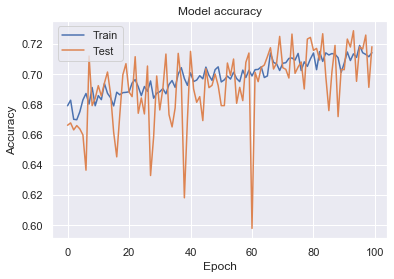

In [134]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

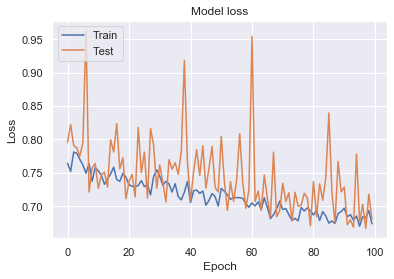

In [136]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()